In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA Analysis

## Data Cleaning

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,Yes
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,No
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,No
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,No
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,Yes


In [5]:
df.tail()

,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
5277,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5278,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5279,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5280,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5281,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


In [6]:
df.columns

Index(['Customer_ID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [7]:
df.shape

(5282, 21)

In [8]:
missing_values = df.isnull().sum()
missing_values

Customer_ID          0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn                0
dtype: int64

We checked for the missing values in the data and luckily the data doesn't have any missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5282 non-null   object 
 1   Gender             5282 non-null   object 
 2   Senior_Citizen     5282 non-null   int64  
 3   Partner            5282 non-null   object 
 4   Dependents         5282 non-null   object 
 5   Tenure             5282 non-null   int64  
 6   Phone_Service      5282 non-null   object 
 7   Multiple_Lines     5282 non-null   object 
 8   Internet_Service   5282 non-null   object 
 9   Online_Security    5282 non-null   object 
 10  Online_Backup      5282 non-null   object 
 11  Device_Protection  5282 non-null   object 
 12  Tech_Support       5282 non-null   object 
 13  Streaming_TV       5282 non-null   object 
 14  Streaming_Movies   5282 non-null   object 
 15  Contract           5282 non-null   object 
 16  Paperless_Billing  5282 

In [10]:
df['Total_Charges'] = df['Total_Charges'].replace(' ', '0')
df['Total_Charges'] = df['Total_Charges'].astype(float)

In [11]:
df.replace({'Yes': 1, 'No': 0, 'No internet service': 2, 'Male': 1, 'Female': 0, 'No phone service': 3}, inplace=True)
df.head()

,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7242-QZLXF,1,0,0,1,1,0,3,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,25.30,25.30,1
1,8325-QRPZR,0,0,0,0,7,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,75.15,525.00,0
2,7874-ECPQJ,0,0,0,1,4,1,0,0,2,...,2,2,2,2,Month-to-month,1,Bank transfer (automatic),20.05,85.50,0
3,2476-YGEFM,0,0,0,0,29,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Credit card (automatic),76.00,2215.25,0
4,2276-YDAVZ,0,0,0,0,3,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Credit card (automatic),75.10,270.70,1


We replaced all the boolean values with integer for the training of our model in the future.

In [12]:
churned_customers = df[df['Churn'] == 1]
non_churned_customers = df[df['Churn'] == 0]

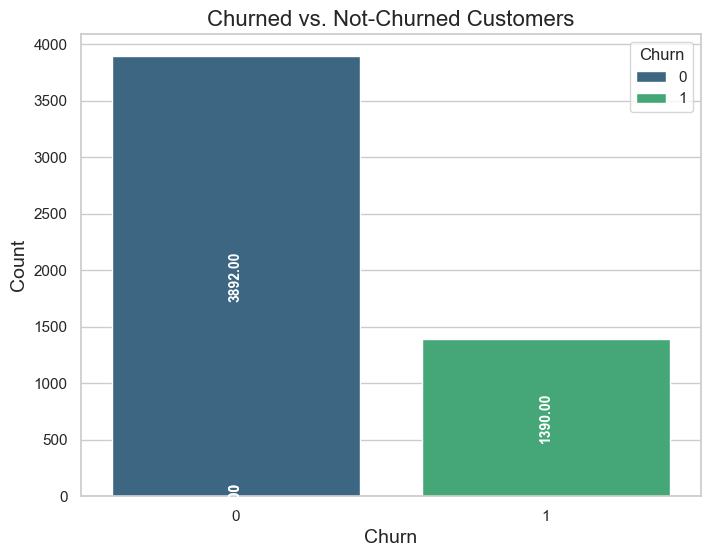

In [13]:
sns.set(style="whitegrid")
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis", hue=churn_counts.index)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()/2),
            ha='center', va='center', color='white', fontsize=10, fontweight='bold', rotation='vertical')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Churned vs. Not-Churned Customers', fontsize=16)
plt.show()

The above bar plot shows that for the company the customers churning are 1390 and the customers staying are 3892. This shows that our churn rate is around 26.31%.

## Non-Binary Feature Analysis

In [14]:
df_categorical_features = df.drop(['Tenure', 'Monthly_Charges', 'Total_Charges'], axis='columns')

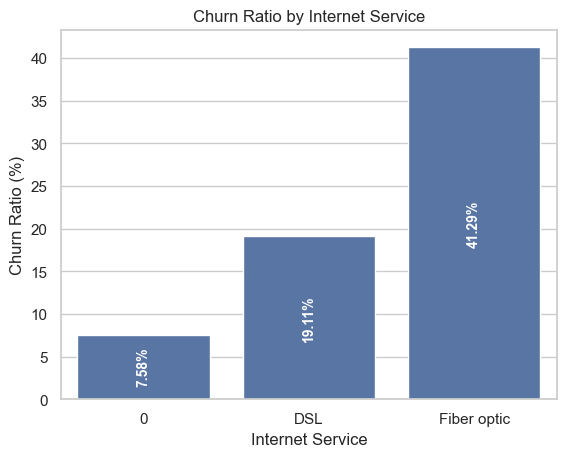

In [15]:
churn_by_internet_service = df.groupby('Internet_Service')['Churn'].mean() * 100
ax1 = sns.barplot(x=churn_by_internet_service.index, y=churn_by_internet_service.values)
plt.xlabel('Internet Service')
plt.ylabel('Churn Ratio (%)')
plt.title('Churn Ratio by Internet Service')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2),
            ha='center', va='center', color='white', fontsize=10, fontweight='bold', rotation='vertical')
plt.show()

The plot clearly shows that the customers who are not using our internet service are having a less churn ratio. And among the users of the internt, the people opting for the Fiber Optic service are tendning to churn more with almost 42 percent of the customers churning. This shows that there is a problem in our internet services and especially the Fiber Optic service. 

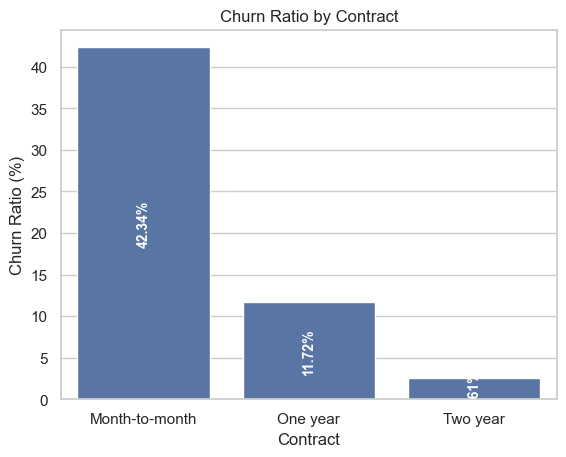

In [16]:
churn_by_contract = df.groupby('Contract')['Churn'].mean() * 100
ax1 = sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values)
plt.xlabel('Contract')
plt.ylabel('Churn Ratio (%)')
plt.title('Churn Ratio by Contract')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2),
            ha='center', va='center', color='white', fontsize=10, fontweight='bold', rotation='vertical')
plt.show()

The above plot shows that the churn rate of the customers opting for a month-to-month plan is very high. This gives us with some important insights. High churn rate in short term packages indicate that the customers are not satisfied by the quality of the service provided by the company and since they are not bound to the company with a contract, they tend to switcht there services.

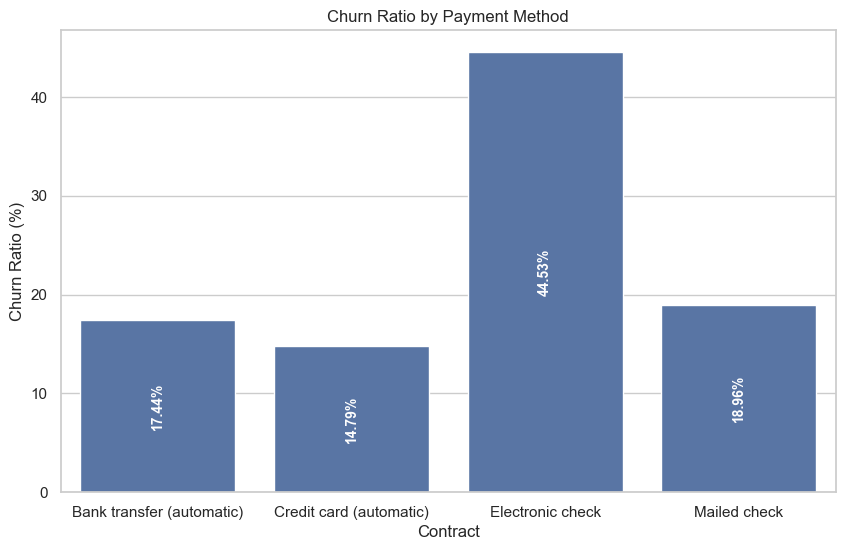

In [17]:
churn_by_payment_method = df.groupby('Payment_Method')['Churn'].mean() * 100
ax1 = sns.barplot(x=churn_by_payment_method.index, y=churn_by_payment_method.values)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel('Contract')
plt.ylabel('Churn Ratio (%)')
plt.title('Churn Ratio by Payment Method')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2),
            ha='center', va='center', color='white', fontsize=10, fontweight='bold', rotation='vertical')
plt.show()

The electronic check payment method is having exceptionally high churn ratio. The reasons for this might be unclear without an user response survey about this payment method. The reasons might include some issues on the server side, error while performing payments or complex procedure or even high processing time. To control the churn ratio, this should be focused on.

## Correlation Analysis

<Axes: >

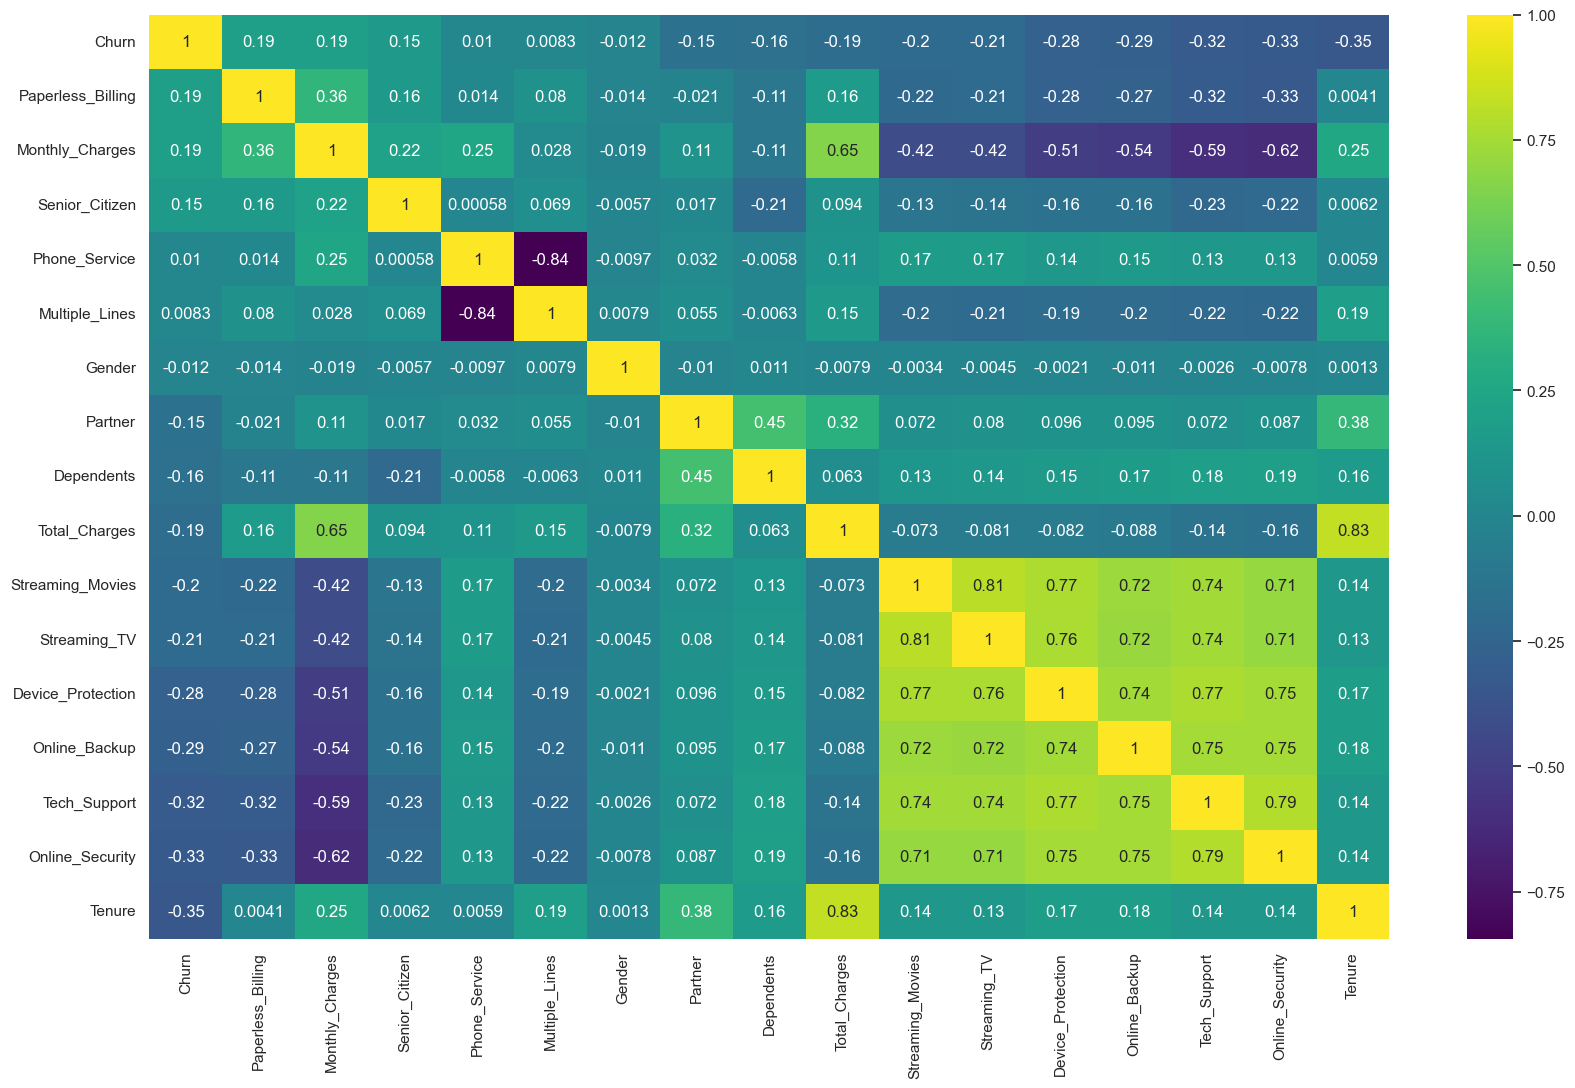

In [18]:
df_non_dummies = df.drop(['Payment_Method', 'Contract', 'Internet_Service', 'Customer_ID'], axis='columns')
k = 17
cols = df_non_dummies.corr().nlargest(k, 'Churn')['Churn'].index
cm = df_non_dummies[cols].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')

The above correlation plot shows us that 'Phone Service', 'Multiple Lines' and 'Gender' has almost negigible effect on the churn ratio thus leading us to drop these columns in the future analysis and in the the prediction model.

In [19]:
from dython.nominal import identify_nominal_columns
from dython.nominal import associations
categorical_features=identify_nominal_columns(df)
categorical_features

['Customer_ID', 'Internet_Service', 'Contract', 'Payment_Method']

In [20]:
selected_column= df[categorical_features + ['Churn']]
categorical_df = selected_column.copy().drop(['Customer_ID'], axis='columns')
categorical_df

,Internet_Service,Contract,Payment_Method,Churn
0,DSL,Month-to-month,Electronic check,1
1,Fiber optic,Month-to-month,Electronic check,0
2,0,Month-to-month,Bank transfer (automatic),0
3,Fiber optic,Month-to-month,Credit card (automatic),0
4,Fiber optic,Month-to-month,Credit card (automatic),1
...,...,...,...,...
5277,Fiber optic,Month-to-month,Electronic check,1
5278,DSL,Two year,Credit card (automatic),0
5279,0,Month-to-month,Electronic check,0
5280,Fiber optic,Month-to-month,Electronic check,1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dython/nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dython/nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


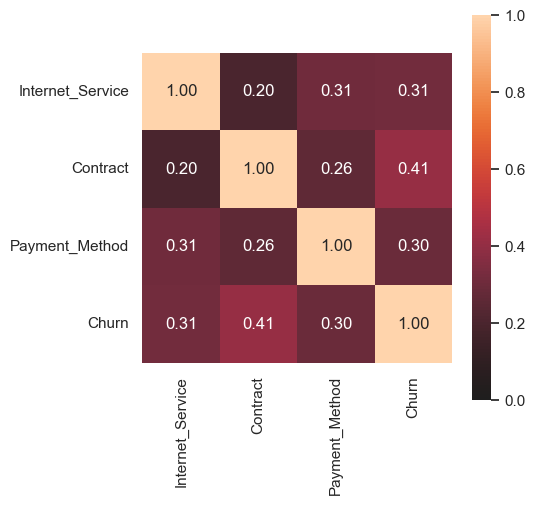

In [21]:
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(5,5))


### Group-wise Analysis of the factors

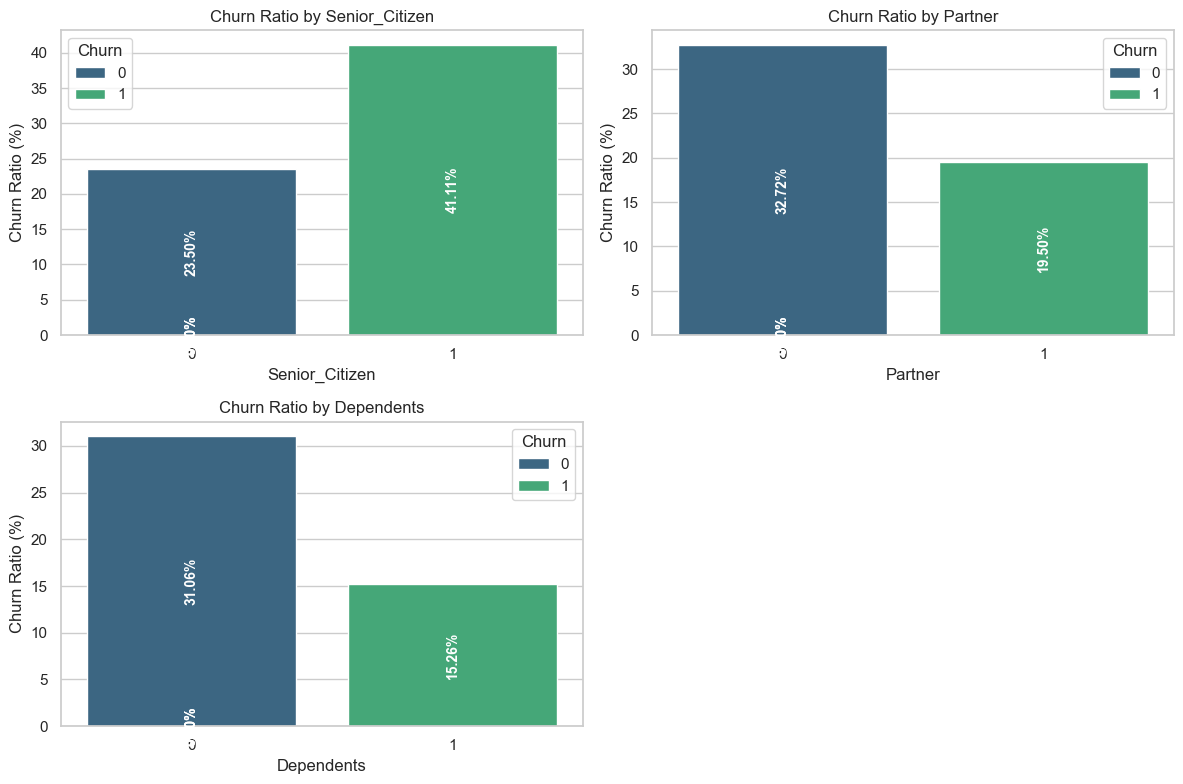

In [22]:
group1 = ['Senior_Citizen', 'Partner', 'Dependents']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(group1, 1):
    plt.subplot(2, 2, i)
    churn_by_feature = df.groupby(feature)['Churn'].mean() * 100
    ax = sns.barplot(x=churn_by_feature.index, y=churn_by_feature.values, palette='viridis', hue=churn_counts.index)
    plt.title(f'Churn Ratio by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Ratio (%)')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2),
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold', rotation='vertical')

plt.tight_layout()
plt.show()

1. The churn rate of the senior citizen is very high that can be cause due to complex billing structure, or the technological barriers for the senior citizen to use the provided application or website. Efficent ans user friendly ways should be introduced to tackle this problem. 
2. Customers not having a partner or a dependent are churning at higher rate than the those having one. The reasons for this observation might include the expense of a personal/solo plan. The benefits or the offers provided by the company for personal plans might be not appealling to the customers in comparison to the offers or the plans provided by the competitors.
3. This can be also due to growth of lack of engagement and companionship in projects mostly involving cooperation and teamwork.

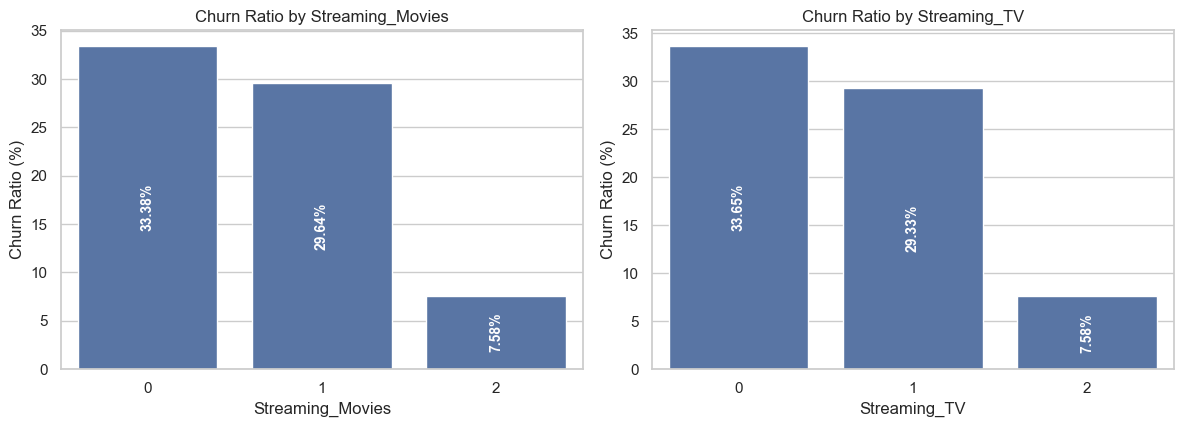

In [23]:
group2 = ['Streaming_Movies', 'Streaming_TV']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(group2, 1):
    plt.subplot(2, 2, i)
    churn_by_feature = df.groupby(feature)['Churn'].mean() * 100
    ax = sns.barplot(x=churn_by_feature.index, y=churn_by_feature.values)
    plt.title(f'Churn Ratio by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Ratio (%)')
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2),
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold', rotation='vertical')

plt.tight_layout()
plt.show()

Insights - 
1. The internet service is not up to the mark.
2. The ones who have the access to internet service - whether they have streamed movies or TV - have not had a great experience with it. The churn can be significantly decreased by making the Internet service better. 

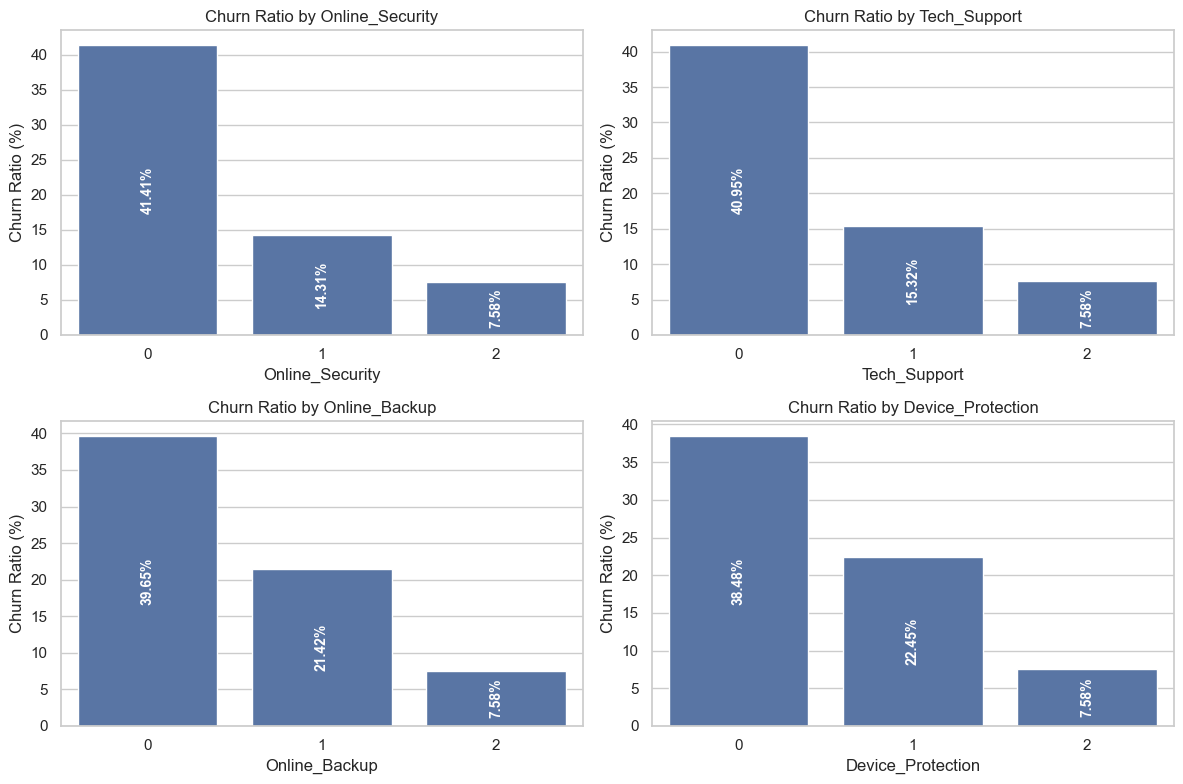

In [24]:
group3 = ['Online_Security', 'Tech_Support', 'Online_Backup', 'Device_Protection']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(group3, 1):
    plt.subplot(2, 2, i)
    churn_by_feature = df.groupby(feature)['Churn'].mean() * 100
    ax = sns.barplot(x=churn_by_feature.index, y=churn_by_feature.values)
    plt.title(f'Churn Ratio by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Ratio (%)')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2),
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold', rotation='vertical')

plt.tight_layout()
plt.show()

1. The above plot clearly shows that the customers who have the internet service but are not opting for the additional services like device protection, online backup, online security and technical support tend to churn. 
2. This is an area of concern for the company since it shows the dependency of our internet package on these additonal services. 
3. To solve this issue, either we need to improve our internet service or we should provide these additional services as a package plan along with the internet service plan. This will ensure that more customers have access to these services and thus the churn rate would reduce.
4. The internet service and additional services go hand in hand with each other. Even if one of them is compromised, it leads to the customer churning. Therfore, we can reduce the churn significantly by ensuring top quality services in both domains. 

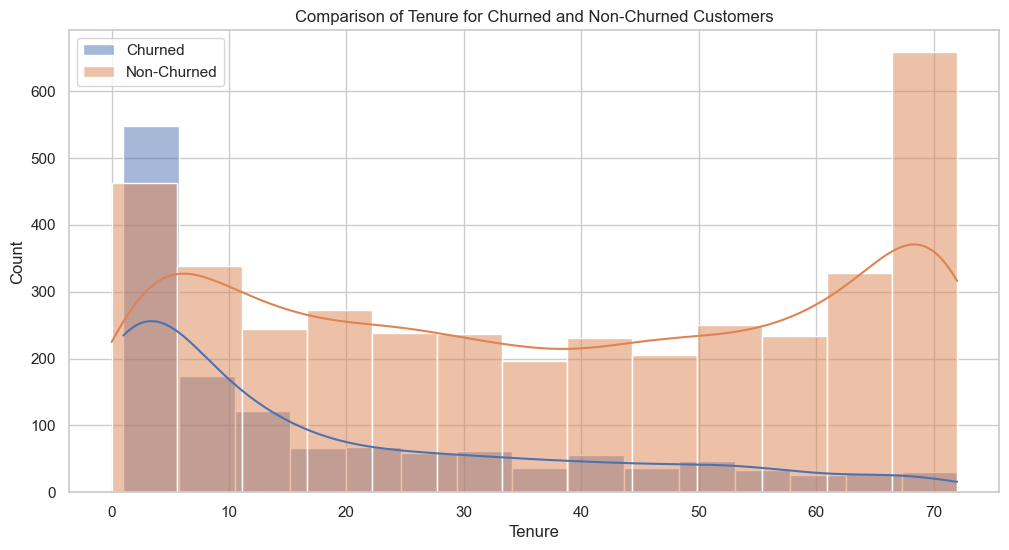

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(churned_customers['Tenure'], label='Churned', kde=True)
sns.histplot(non_churned_customers['Tenure'], label='Non-Churned', kde=True)
plt.title('Comparison of Tenure for Churned and Non-Churned Customers')
plt.xlabel('Tenure')
plt.legend()
plt.show()

The above KDE curves shows us that the churn rate is decreasing as the tenure is increasing. This shows that the company has a very poor 'New User Experience' and that is one of the major area to improve if we have to decrease the churn rate. Another reason can be that the company doesn't live up to the expectations the customers come with, this may include poor services whether its internet services or tech support.

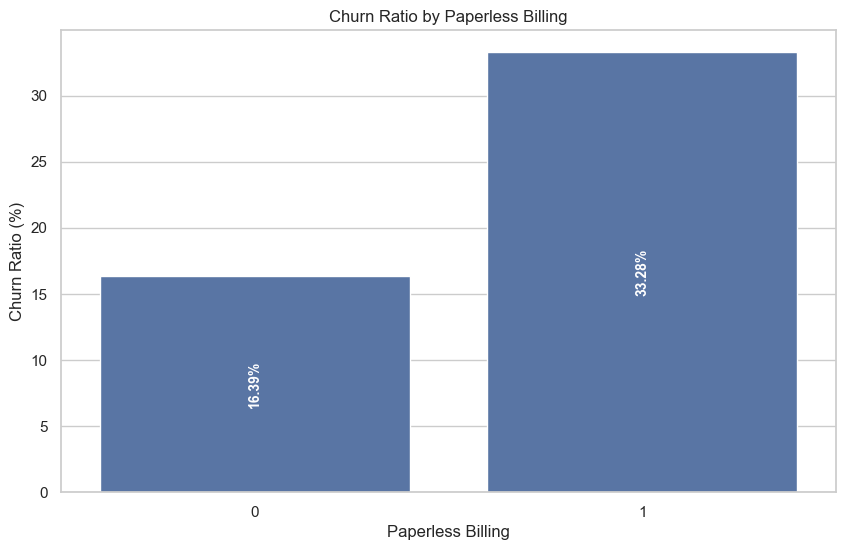

In [26]:
churn_by_paperless_billing = df.groupby('Paperless_Billing')['Churn'].mean() * 100
ax1 = sns.barplot(x=churn_by_paperless_billing.index, y=churn_by_paperless_billing.values)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel('Paperless Billing')
plt.ylabel('Churn Ratio (%)')
plt.title('Churn Ratio by Paperless Billing')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2),
            ha='center', va='center', color='white', fontsize=10, fontweight='bold', rotation='vertical')
plt.show()

1. The above graph gives us a very impotant insight and that is, the customers opting for the paperless billing are tending to leave the company at a significantly high rate. This puts our digital communication sector in focus. 
2. Probably the customers are being troubled by excessive emails, unclear statements or having difficulty in accessing their accounts. Or the customer are finding the bills unclear or lacking the important details. 
3. It can also be that the customers have experienced or heard about the lack of security in billing and thus are churning. Technical team of the company needs lot of improvement for controlling the churn rate.

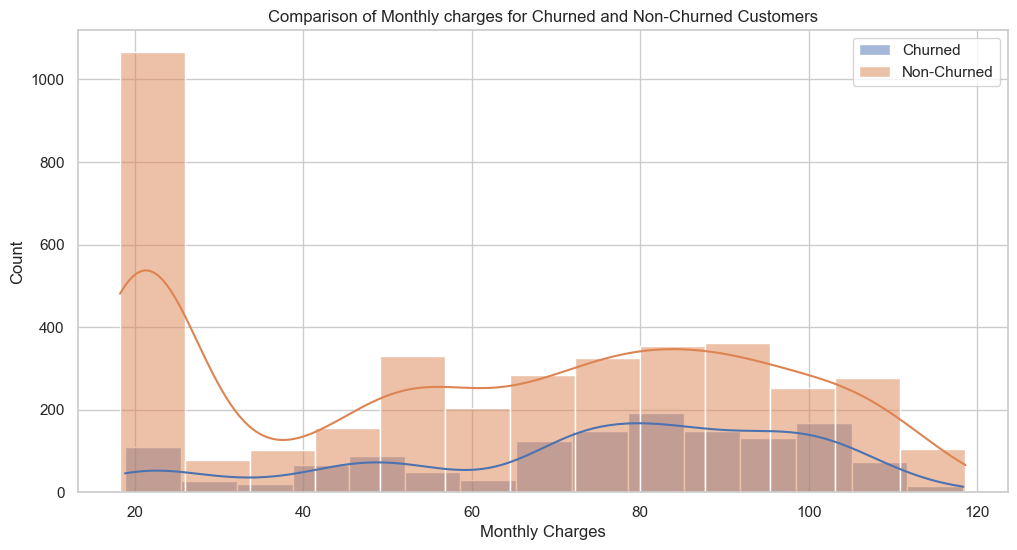

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(churned_customers['Monthly_Charges'], label='Churned', kde=True)
sns.histplot(non_churned_customers['Monthly_Charges'], label='Non-Churned', kde=True)
plt.title('Comparison of Monthly charges for Churned and Non-Churned Customers')
plt.xlabel('Monthly Charges')
plt.legend()
plt.show()

Insights:- 
1. The graph is interesting. As we can see, the churn rate reaches a maxima then it decreases on increasing the monthly charge. 
2. It can be said that customers having a plan with multiple dependents are happy with the service and they seem its valid to pay a little extra for the benefits this plan offers.
3. However, on the other side when the monthly charge is neither cheap not expensive, the churn increases pointing out that this is the individual plan that does not seem to be worth the features and benefits it comes with.


# Conclusion

Following insights can be taken from the EDA :
1. The internet service provided by the company needs major improvement. This can be deduced by the fact that the customers having no access to internet service have churned way less in comparison to the customers who have, whether they have streamed movies, tv or not. 
2. Many factors like device protection, online backup, online security and technical support go hand in hand with internet services. If either one of them is not up to the mark, the overall churn rate increases. Practices and Steps should be made to improve this sector. Also, this also concludes that the incompetence by tech team is majorly responsible for customers churning. 
3. It can be deduced from the graphs that senior citizens are more likely to churn than young blood. To overcome this, user-freindly interfaces and regular workshops should be taken to spread awareness about the functionality of modern tech products. 
4. To support the previous point, we have noticed that the customers opting for paperless billing have churned more than the customers who have not. This puts our digital communication sector in focus.Probably the customers are being troubled by excessive emails, unclear statements or having difficulty in accessing their accounts. Or the customer are finding the bills unclear or lacking the important details (thereby being hard for the senior citizens to use the service as a whole). 
5. High churn rate in short term packages indicate that the customers are not satisfied by the quality of the service provided by the company and since they are not bound to the company with a contract, they tend to switcht there services.
6. Churn by customers having dependents or customers in relationship is less in comparison to the customers having no partner. Therefore, it can be deduced that the individual plan needs improvement and more accessibilities. From the graph considering monthly charges as a factor, it can be seen that the churn rate decreases as the monthly charge increases after a point. It can be said that customers having a plan with multiple dependents are happy with the service and they seem its valid to pay a little extra for the benefits this plan offers. However, on the other side when the monthly charge is neither cheap not expensive, the churn increases pointing out that this is the individual plan that does not seem to be worth the features and benefits it comes with. Overalls, this proves that the individual plan should be worked upon in terms of features and benefits. 
7. Another factor is new user experience. From the tenure versus churn graph we can that churn rate is high for the new customers. It decreases as the tenure increases.
8. The electronic check payment method is having exceptionally high churn ratio. The reasons for this might be unclear without an user response survey about this payment method. The reasons might include some issues on the server side, error while performing payments or complex procedure or even high processing time. The tech team again has to come up with solutions in this domain. 
